In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("veri_setleri/kalp_rahatsizligi.csv",sep=",")
df.head(3)

In [ ]:
df.info()

In [59]:
df.rename(columns={"gogus_agrisi_tipi":"gat",
"hareketsiz_kan_basinci":"hkb",
"serum_kolestrol":"sk",
"aclik_kan_sekeri":"aks",
"elektrokardiyografi":"ekg",
"en_yuksek_kalp_hizi":"eykh",
"anjin_bagli_egsersiz":"abe",
"st_depresyonu":"std",
"st_egimi":"ste",
"buyuk_damarlar":"bds"
},inplace=True)


In [ ]:
df.info()

In [62]:
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
bds=df.iloc[:,[11]].values.reshape(-1,1) # bds=df["bds"].values.reshape(-1,1)
tal=df.iloc[:,[12]].values.reshape(-1,1) # tal=df["talasemi"].values.reshape(-1,1)

df["bds"]=imp.fit_transform(bds)
df["talasemi"]=imp.fit_transform(tal)

In [ ]:
df.info()

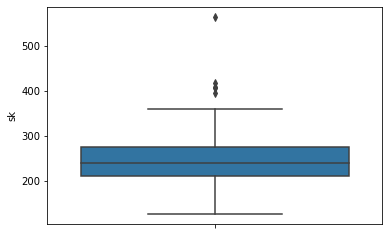

In [64]:
sns.boxplot(data=df,y="sk")
plt.show()

In [28]:
df.describe()

,yas,hkb,sk,aks,eykh,abe,std,bds,kalp_rahatsizligi
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.663366,0.458746
std,9.038662,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.934375,0.499120
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [65]:
df=df[(df["sk"]>=115)&(df["sk"]<=375)]

In [66]:
df.count()

yas                  298
cinsiyet             298
gat                  298
hkb                  298
sk                   298
aks                  298
ekg                  298
eykh                 298
abe                  298
std                  298
ste                  298
bds                  298
talasemi             298
kalp_rahatsizligi    298
dtype: int64

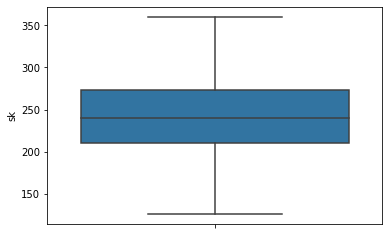

In [67]:
sns.boxplot(data=df,y="sk")
plt.show()

In [68]:
df["ekg"].unique()

array(['sol ventikuler hipertrofi', 'normal', 'ST-T anormal'],
      dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                298 non-null    float64
 1   cinsiyet           298 non-null    object 
 2   gat                298 non-null    object 
 3   hkb                298 non-null    float64
 4   sk                 298 non-null    float64
 5   aks                298 non-null    int64  
 6   ekg                298 non-null    object 
 7   eykh               298 non-null    float64
 8   abe                298 non-null    int64  
 9   std                298 non-null    float64
 10  ste                298 non-null    object 
 11  bds                298 non-null    float64
 12  talasemi           298 non-null    object 
 13  kalp_rahatsizligi  298 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 34.9+ KB


In [69]:
le=LabelEncoder()
df["cinsiyet"]=le.fit_transform(df["cinsiyet"])
df["gat"]=le.fit_transform(df["gat"])
df["ekg"]=le.fit_transform(df["ekg"])
df["ste"]=le.fit_transform(df["ste"])
df["talasemi"]=le.fit_transform(df["talasemi"])



In [70]:
df.head()

,yas,cinsiyet,gat,hkb,sk,aks,ekg,eykh,abe,std,ste,bds,talasemi,kalp_rahatsizligi
0,63.0,0,3,145.0,233.0,1,2,150.0,0,2.3,0,0.0,1,0
1,67.0,0,1,160.0,286.0,0,2,108.0,1,1.5,1,3.0,0,1
2,67.0,0,1,120.0,229.0,0,2,129.0,1,2.6,1,2.0,2,1
3,37.0,0,0,130.0,250.0,0,1,187.0,0,3.5,0,0.0,0,0
4,41.0,1,2,130.0,204.0,0,2,172.0,0,1.4,2,0.0,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                298 non-null    float64
 1   cinsiyet           298 non-null    int64  
 2   gat                298 non-null    int64  
 3   hkb                298 non-null    float64
 4   sk                 298 non-null    float64
 5   aks                298 non-null    int64  
 6   ekg                298 non-null    int64  
 7   eykh               298 non-null    float64
 8   abe                298 non-null    int64  
 9   std                298 non-null    float64
 10  ste                298 non-null    int64  
 11  bds                298 non-null    float64
 12  talasemi           298 non-null    int64  
 13  kalp_rahatsizligi  298 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 34.9 KB


In [77]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y=df.iloc[:,[13]].values

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [120]:
dvm=SVC()
dvm.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=6)

In [128]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

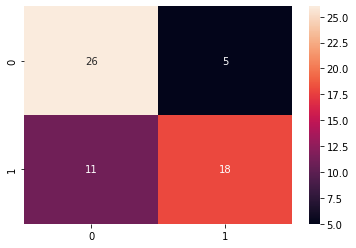

In [129]:
y_pred=dvm.predict(x_test)
cfm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cfm,annot=True)
plt.show()

In [123]:
skor= dvm.score(x_test,y_test)
skor

0.6833333333333333